In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from google.colab import files
from sklearn import preprocessing
uploaded = files.upload()
     


Saving Fish.csv to Fish (1).csv


In [3]:
df = pd.read_csv("Fish.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


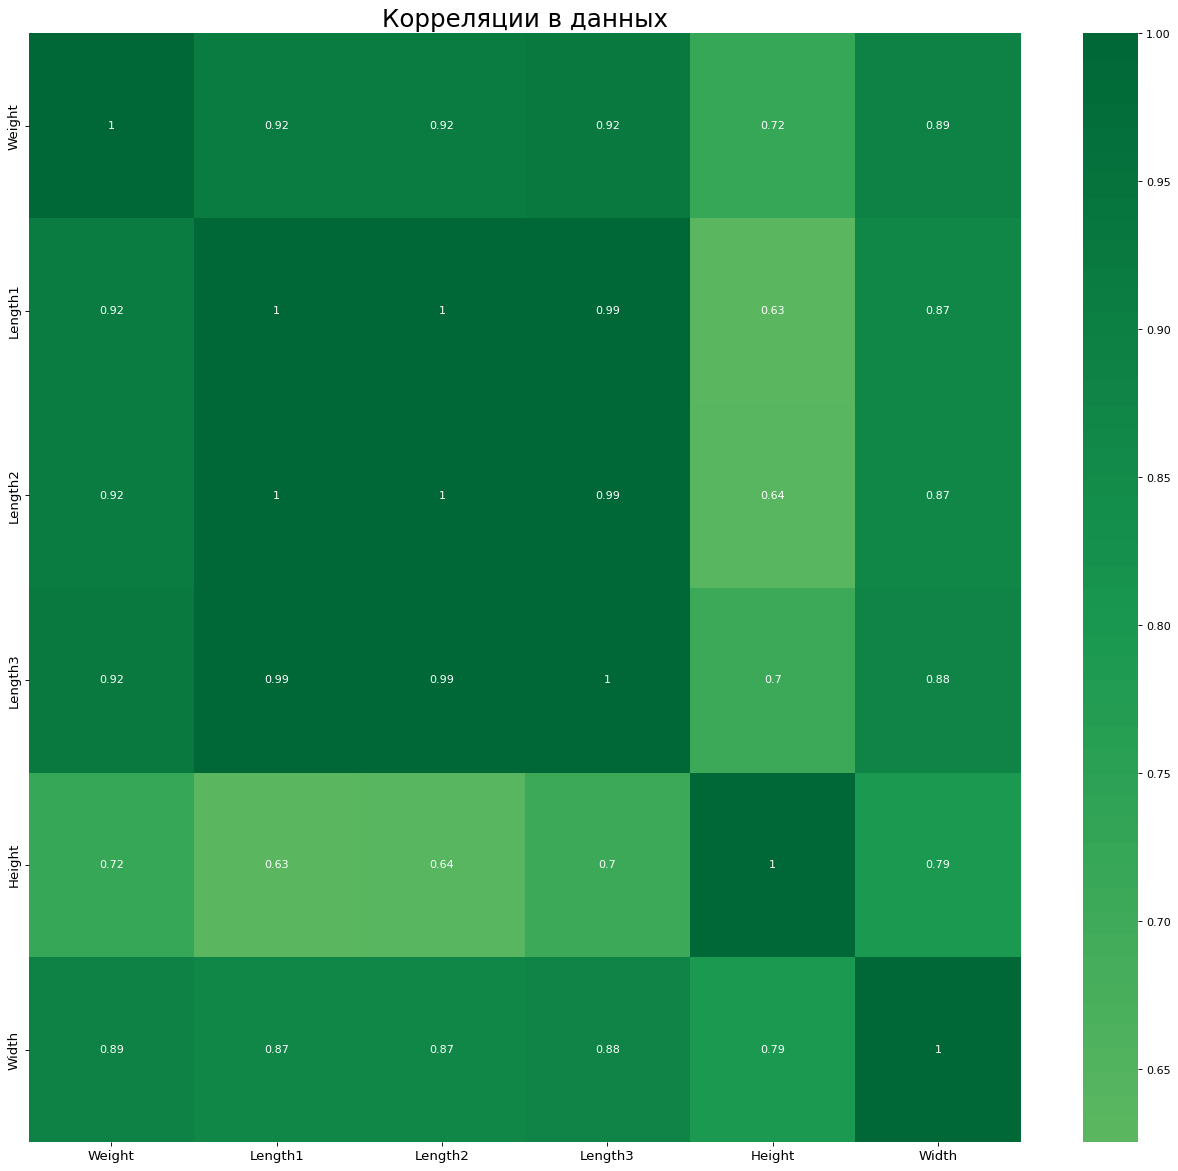

In [5]:
plt.figure(figsize=(20,18), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True) 
plt.title(label='Корреляции в данных', fontsize=22) 
plt.xticks(fontsize=12) 
plt.yticks(fontsize=12) 
plt.show()
     


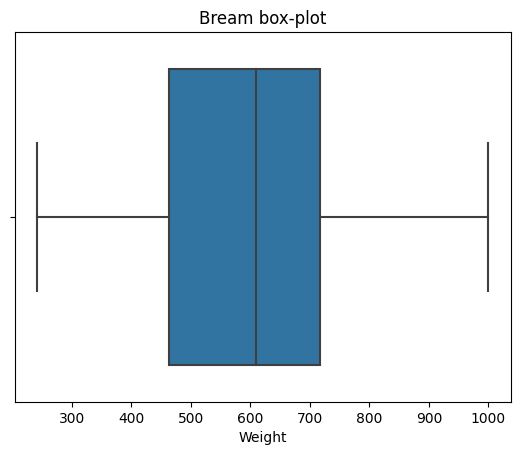

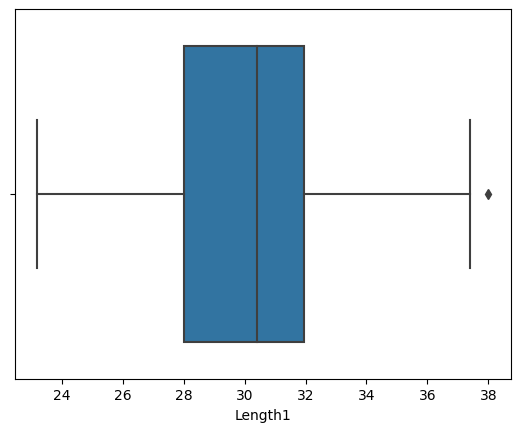

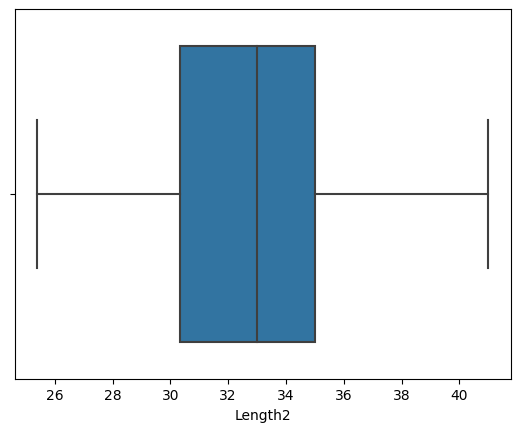

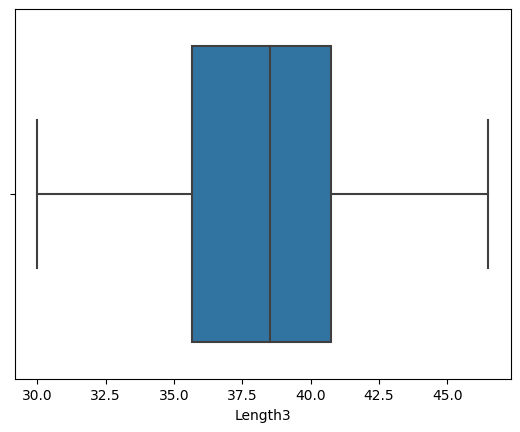

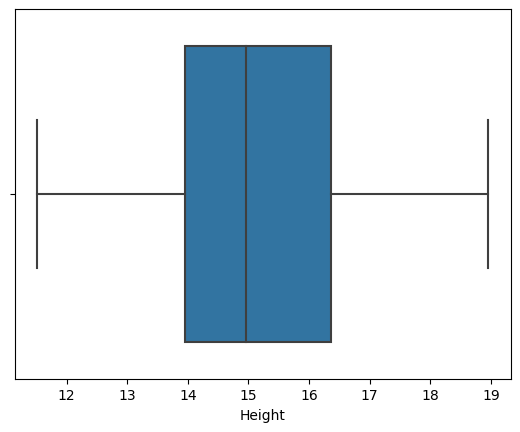

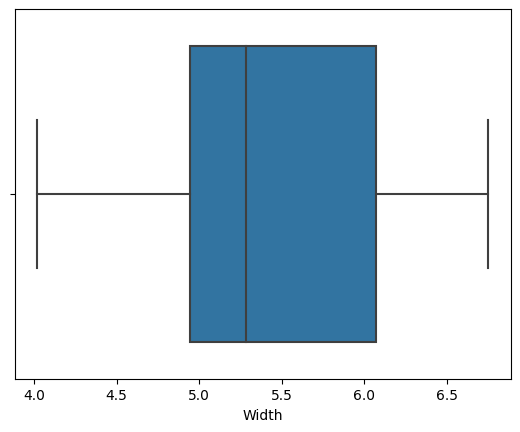

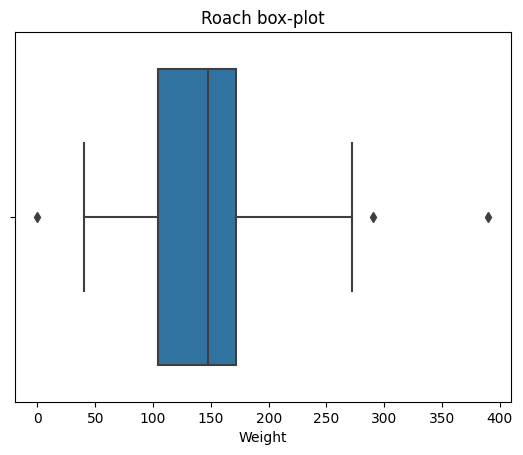

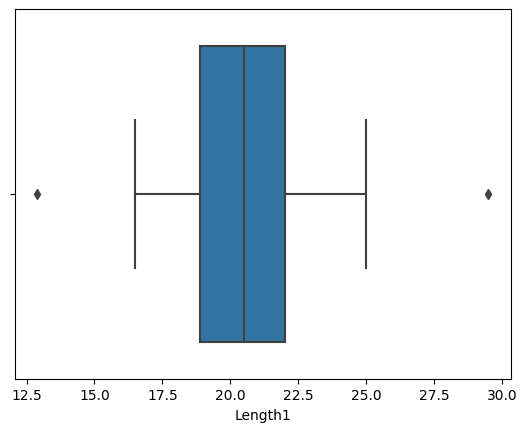

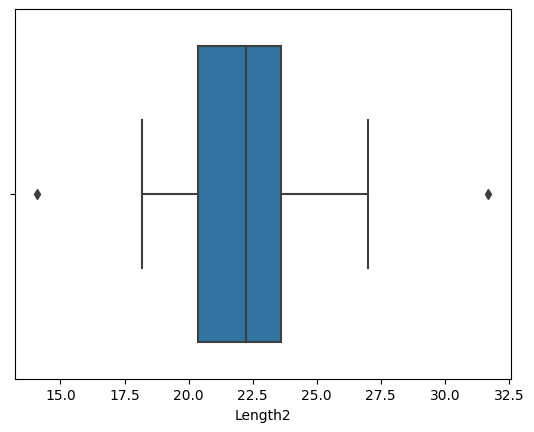

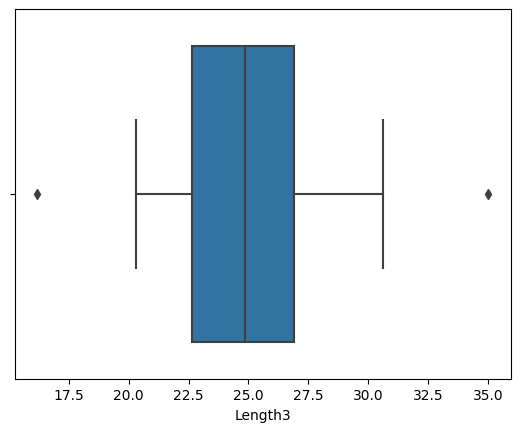

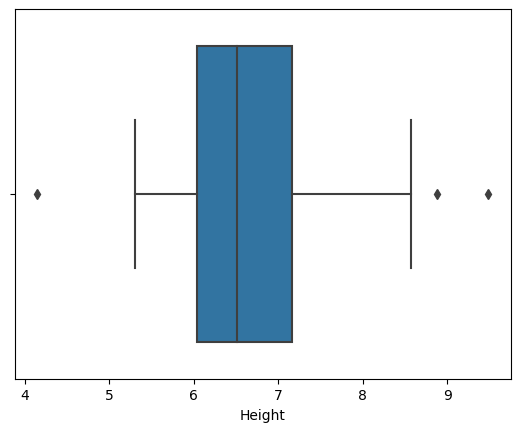

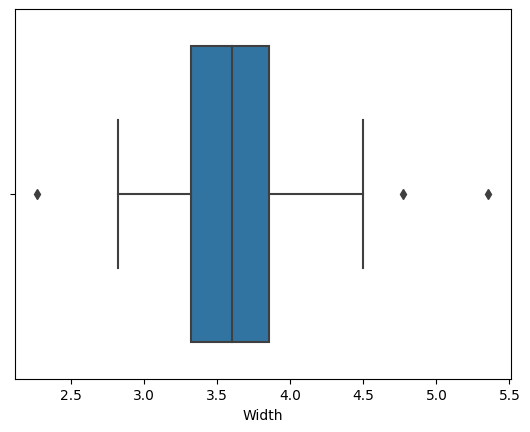

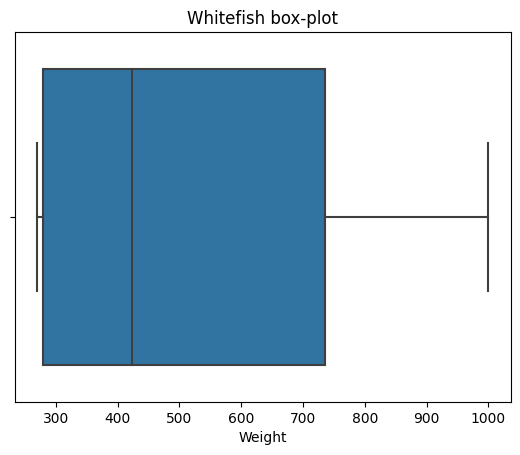

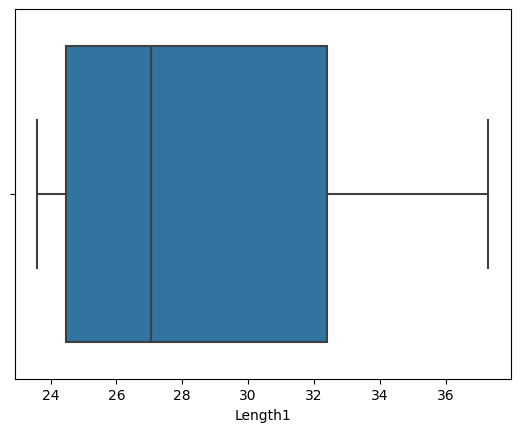

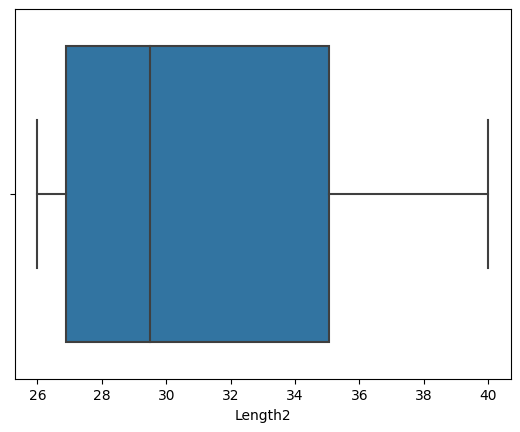

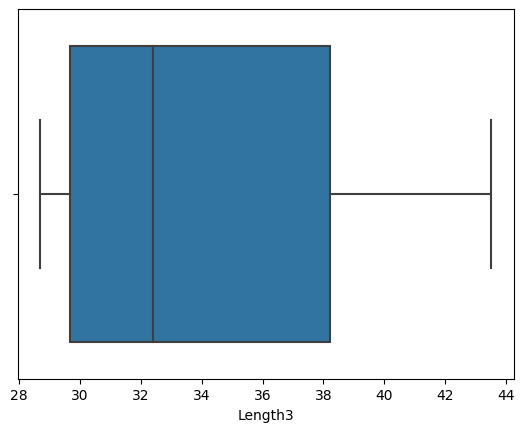

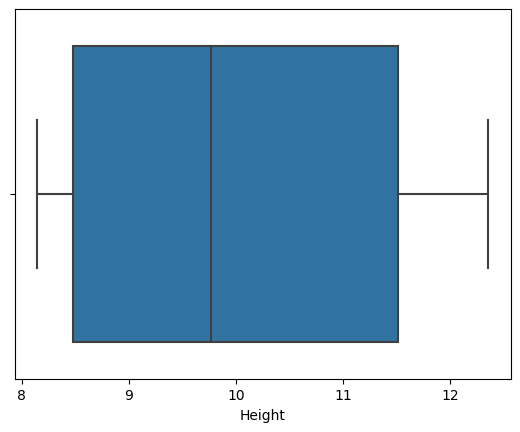

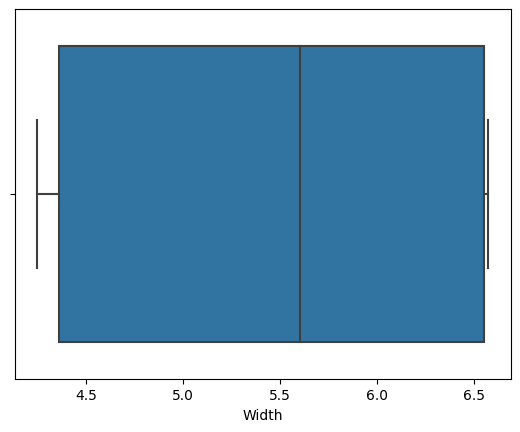

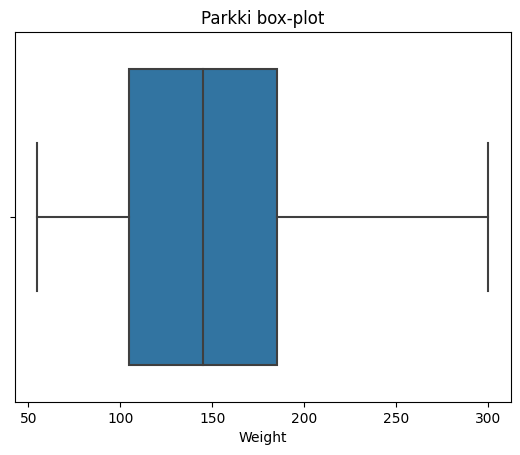

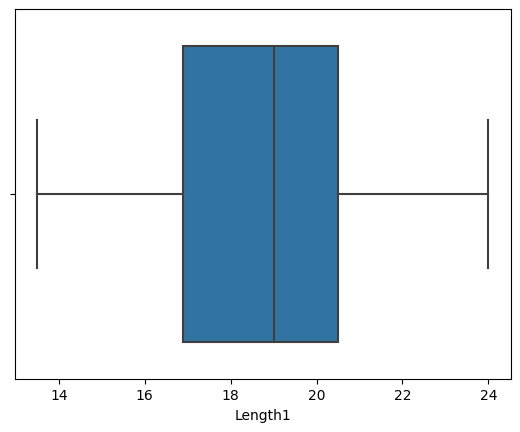

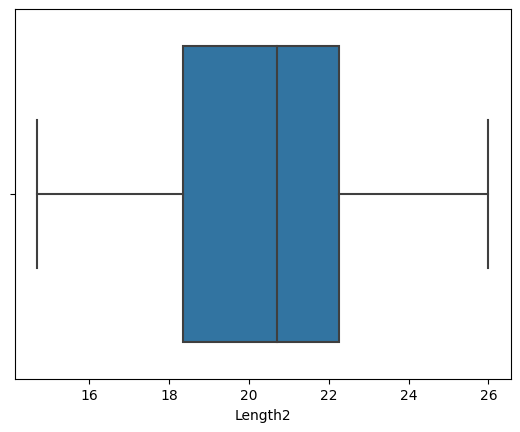

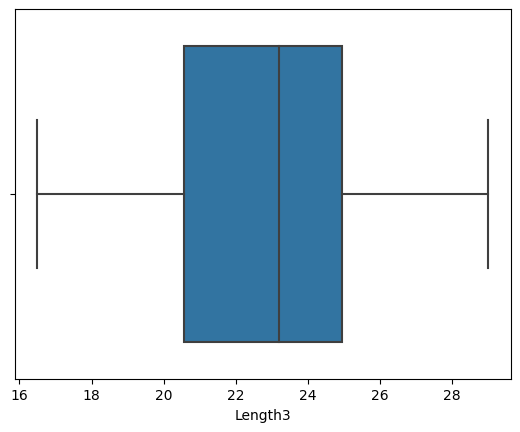

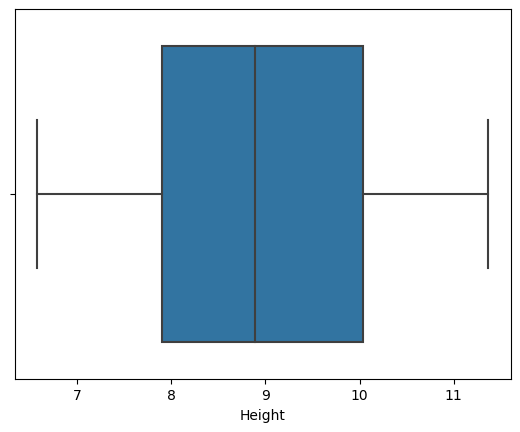

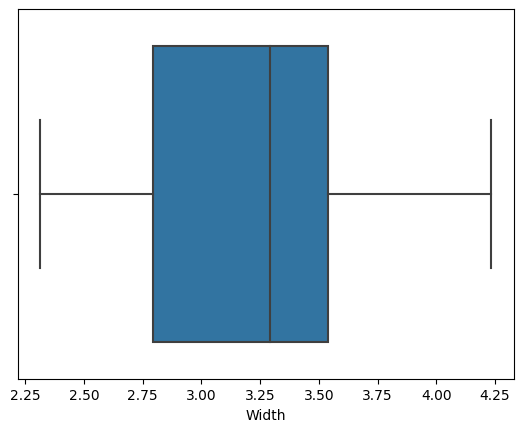

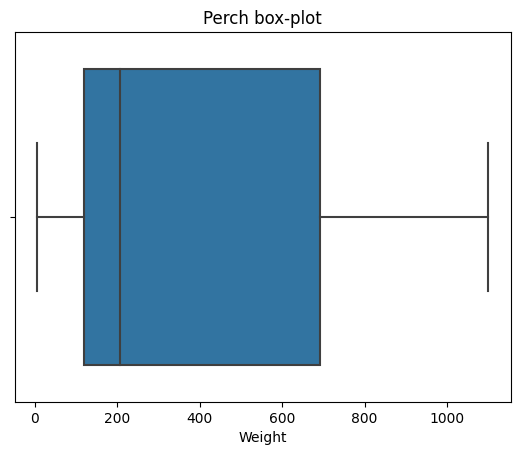

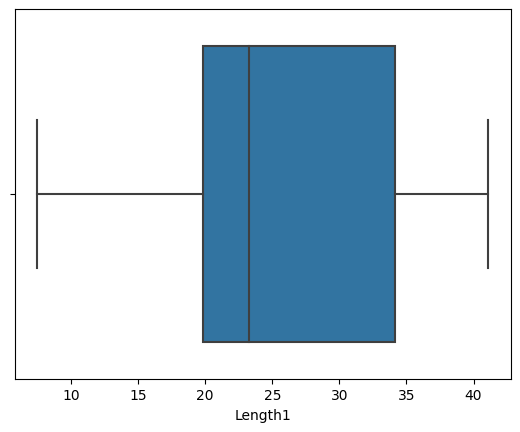

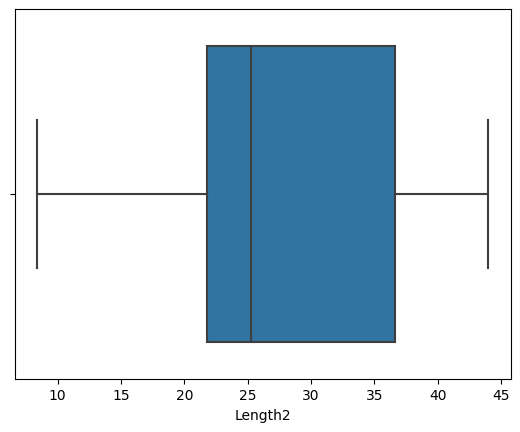

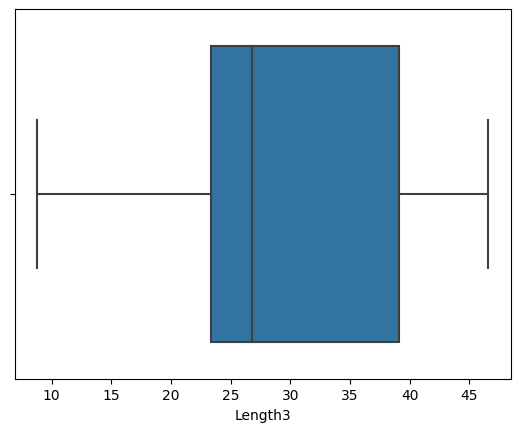

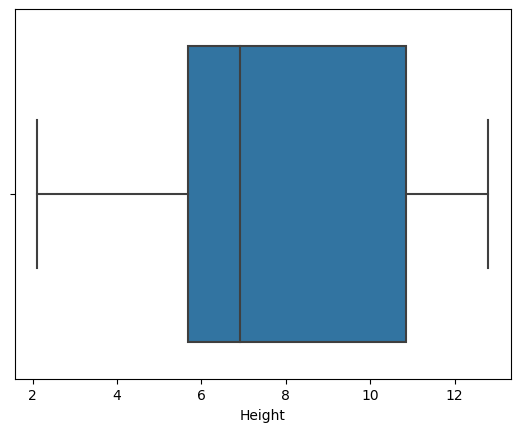

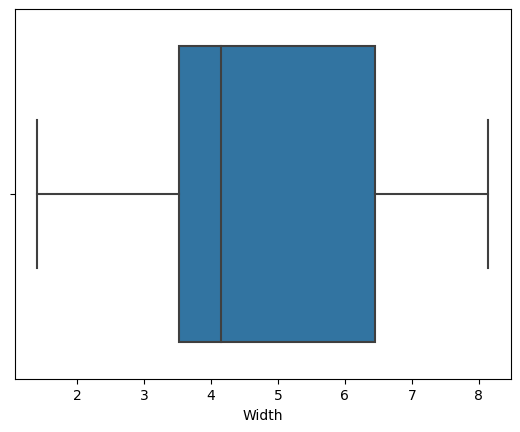

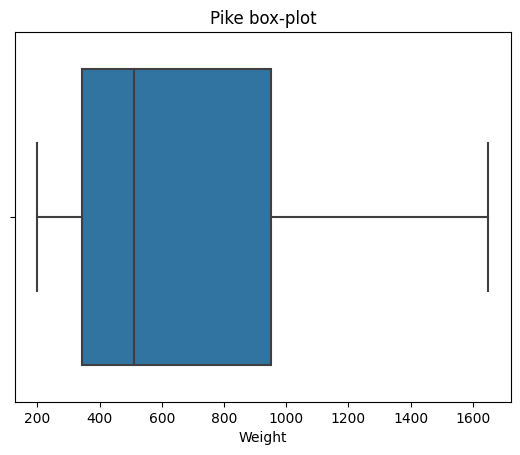

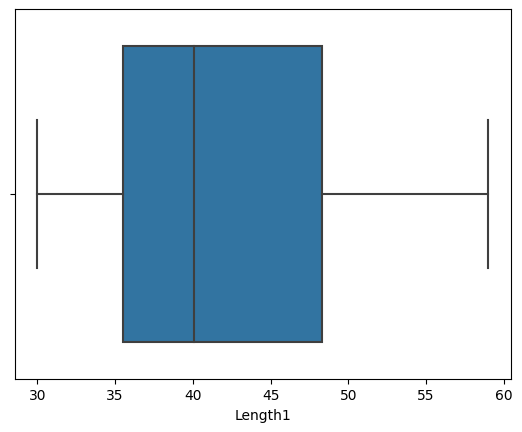

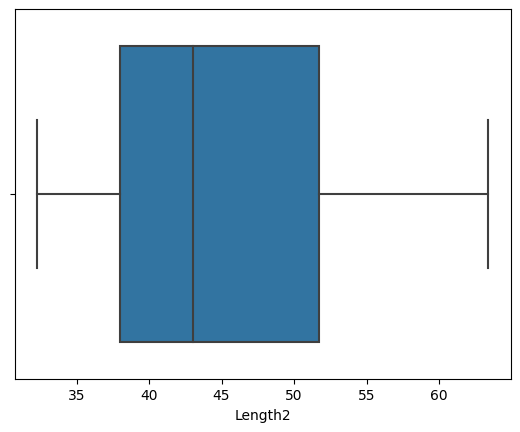

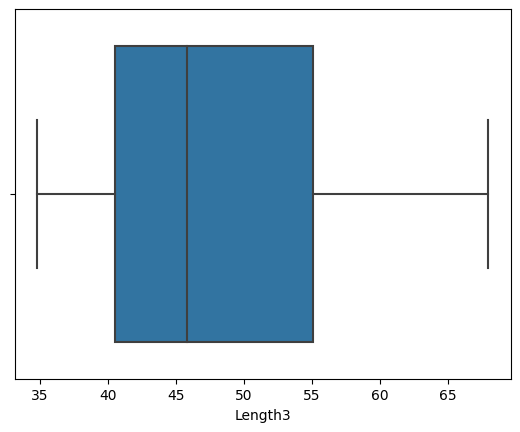

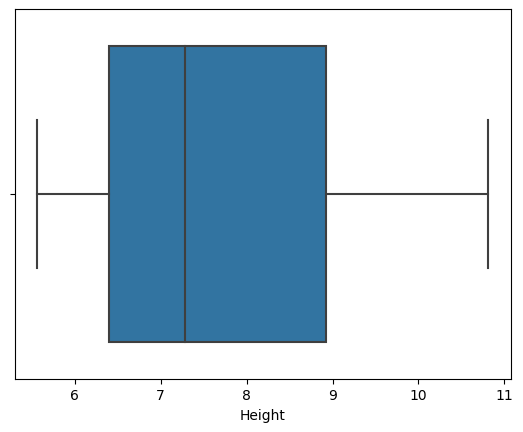

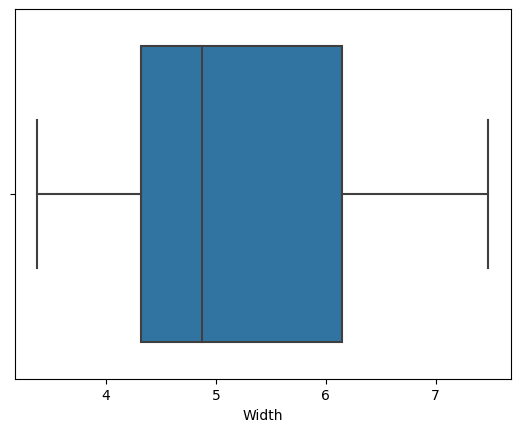

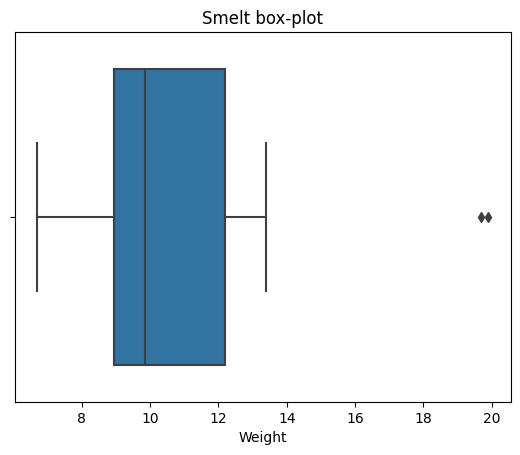

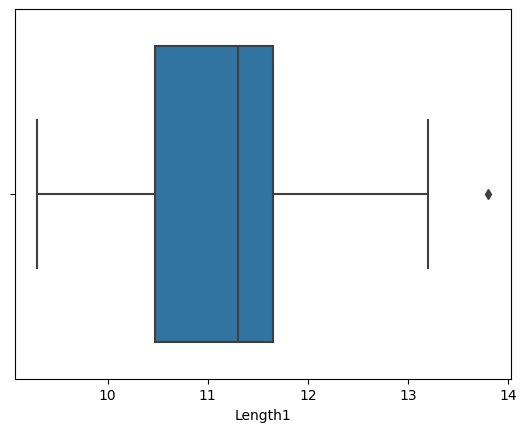

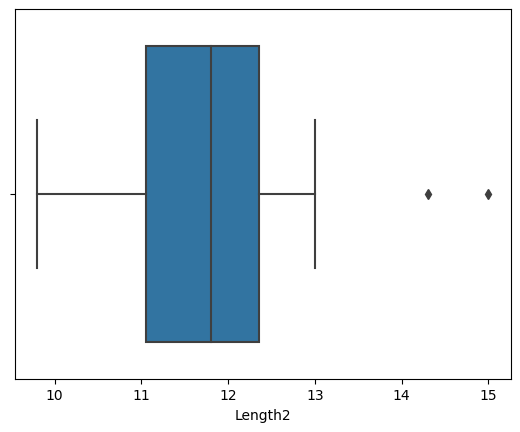

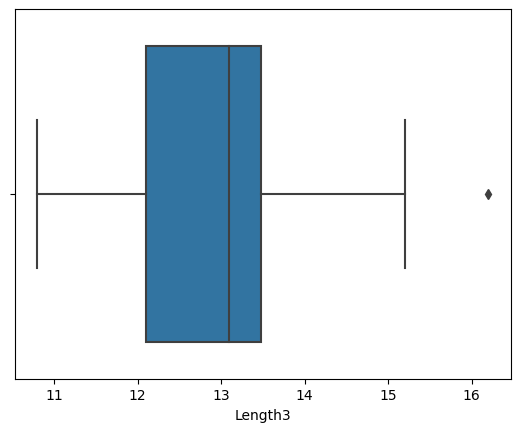

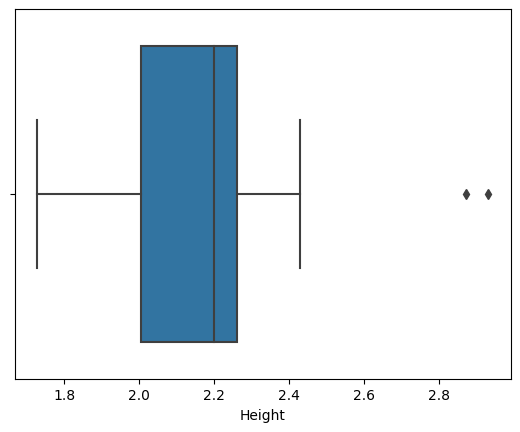

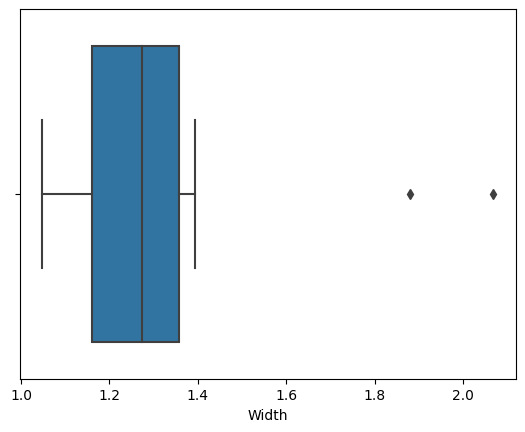

In [13]:
for i in df["Species"].unique():
    plt.title(f"{i} box-plot")
    for j in df.columns:
        if j != "Species":
            sns.boxplot(x = df[df["Species"] == i][j])
            plt.show()
    

In [26]:
filtered = []
for i in df["Species"].unique():
  species = df[df["Species"] == i]
  for j in df.columns:
    if j != "Species":
      lower, upper = species[j].quantile(0.25) - 1.5 * (species[j].quantile(0.75) - species[j].quantile(0.25)) , species[j].quantile(0.75) + 1.5 * (species[j].quantile(0.75) - species[j].quantile(0.25))
      species = species[species[j] >= lower]
      species = species[species[j] <= upper]
  filtered.append(species)
df1 = pd.concat(filtered)
df1.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151 entries, 0 to 156
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  151 non-null    object 
 1   Weight   151 non-null    float64
 2   Length1  151 non-null    float64
 3   Length2  151 non-null    float64
 4   Length3  151 non-null    float64
 5   Height   151 non-null    float64
 6   Width    151 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.4+ KB


In [27]:
y = df1['Weight']
x = df1.drop(columns=["Weight"])
encoder = preprocessing.LabelEncoder()
encoder.fit(x['Species'])
x["Species"] = encoder.transform(x["Species"])
x

,Species,Length1,Length2,Length3,Height,Width
0,0,23.2,25.4,30.0,11.5200,4.0200
1,0,24.0,26.3,31.2,12.4800,4.3056
2,0,23.9,26.5,31.1,12.3778,4.6961
3,0,26.3,29.0,33.5,12.7300,4.4555
4,0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
152,5,11.3,11.8,13.1,2.2139,1.1659
153,5,11.4,12.0,13.2,2.2044,1.1484
154,5,11.5,12.2,13.4,2.0904,1.3936
155,5,11.7,12.4,13.5,2.4300,1.2690


In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [33]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [34]:
print('y =', ' + '.join([ str(x) + "*x" + str(i)   for i, x in  enumerate(model.coef_)]), "+", model.intercept_ )

y = 27.300026618444644*x0 + 5.185487094907032*x1 + 45.81359835420173*x2 + -29.91735204856305*x3 + 30.759730566243892*x4 + 41.559430349318305*x5 + -633.8235334148737


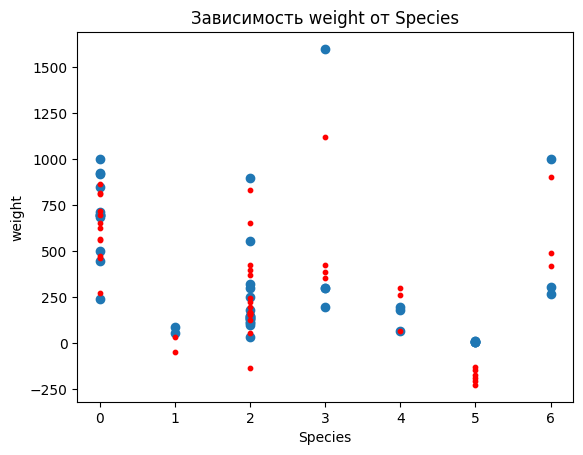

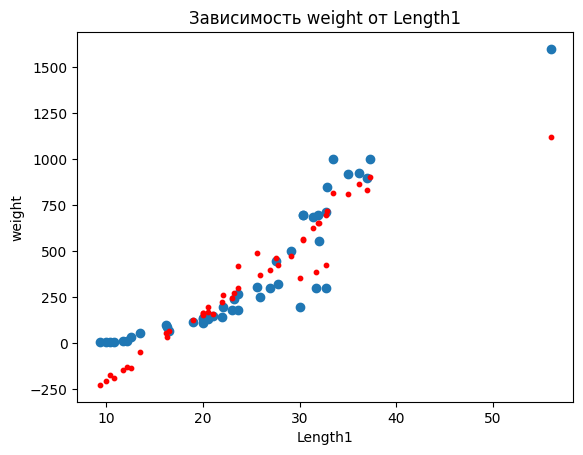

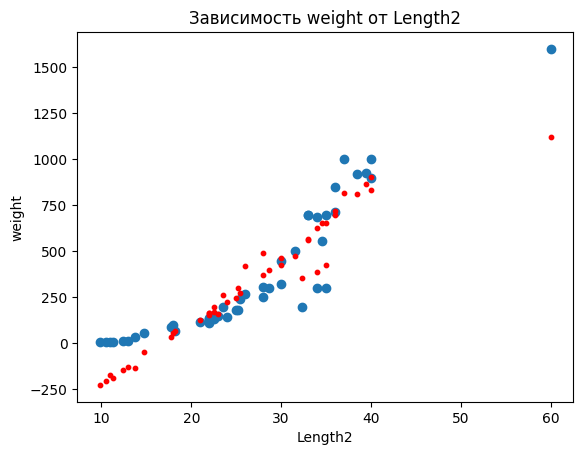

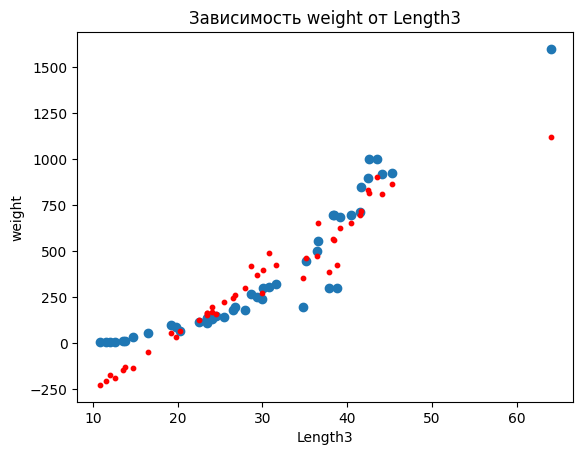

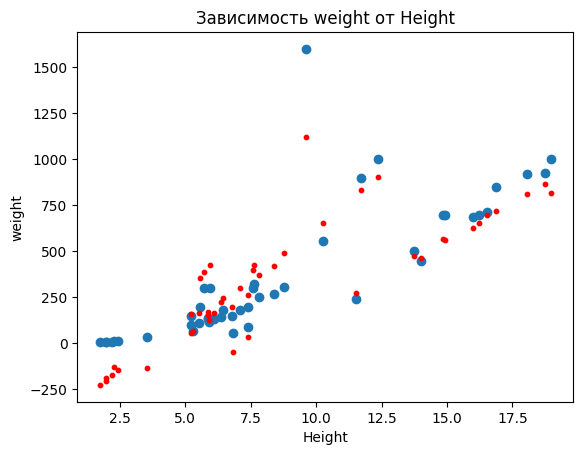

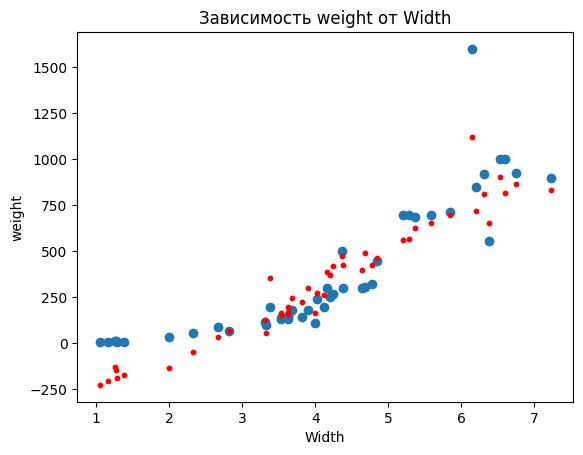

In [36]:
y_pred = model.predict(x_test)
for column in x_test.columns:
  plt.xlabel(column)
  plt.title(f"Зависимость weight от {column}")
  plt.ylabel("weight")
  plt.scatter(x_test[column], y_test)
  plt.scatter(x_test[column], y_pred, color='red', s=10)
  plt.show()

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 score:', r2_score(y_test, y_pred))

Mean Absolute Error: 108.18369841700786
Mean Squared Error: 19203.466508411995
R2 score: 0.8647554034664008
